In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load Data
train_df = pd.read_csv("../../data/train_set.csv")
test_df  = pd.read_csv("../../data/test_set.csv")

target = "NObeyesdad"

X_train_full = train_df.drop(columns=[target])
y_train_full = train_df[target]

X_test_final = test_df.drop(columns=[target])
y_test_final = test_df[target]

# Identify Numerical and Categorical Columns
num_cols = X_train_full.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train_full.select_dtypes(include=["object", "bool"]).columns.tolist()

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Best Model Pipeline (from hyperparameter tuning)
best_svm = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("svm", SVC(
        kernel="linear",
        C=10,
        gamma="scale",
        random_state=42
    ))
])

# Train on Full Training Data
best_svm.fit(X_train_full, y_train_full)

# Final Test Set Evaluation
y_pred_final = best_svm.predict(X_test_final)

final_acc = accuracy_score(y_test_final, y_pred_final)
final_f1  = f1_score(y_test_final, y_pred_final, average="macro")

print("FINAL TEST ACCURACY:", final_acc)
print("FINAL TEST MACRO F1:", final_f1)


FINAL TEST ACCURACY: 0.9787234042553191
FINAL TEST MACRO F1: 0.9776716361914966


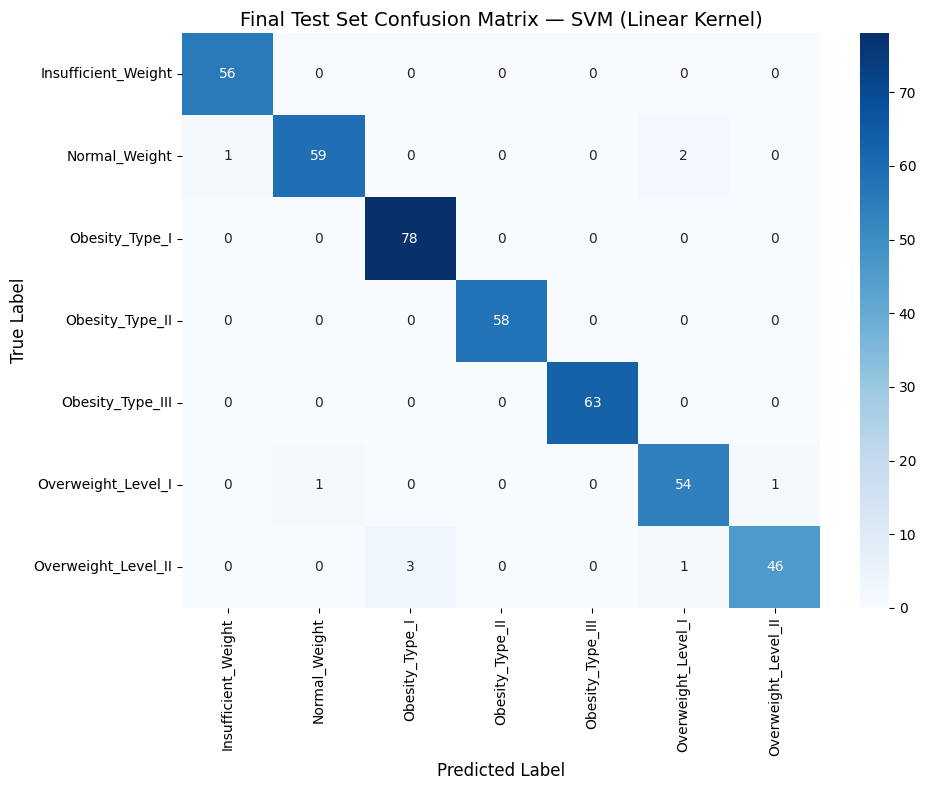

Saved final_svm_confusion_matrix.png to OUTPUT folder.


In [4]:
# Confusion Matrix for Final Test Set
cm = confusion_matrix(y_test_final, y_pred_final)
labels = sorted(y_test_final.unique())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

# Plot customization
plt.title("Final Test Set Confusion Matrix — SVM (Linear Kernel)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save to OUTPUT folder
os.makedirs("../../OUTPUT", exist_ok=True)
plt.savefig("../../OUTPUT/final_svm_confusion_matrix.png", dpi=300)

plt.show()

print("Saved final_svm_confusion_matrix.png to OUTPUT folder.")
